In [2]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.preprocessing import MinMaxScaler
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

## Part 1:
### First let's go over an example with a simple random generated data for illustration purposes

#### first creating our random data

In [3]:
dataset = make_blobs(n_samples=1000, n_features=3, centers=2, random_state=101)
#dataset #you can take a look to the generated data by uncomment and run the cell

#### Scalling our Features

In [4]:
scaler = MinMaxScaler()
data = scaler.fit_transform(dataset[0])

#### Plotting our data in 3D space

In [5]:
#Dividing our three features two match the 3D shape
I = data[:, 0]
J = data[:, 1]
K = data[:, 2]

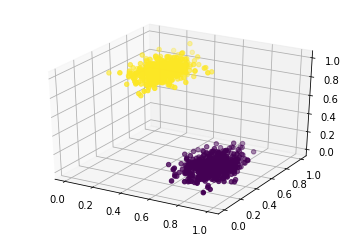

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(I, J, K, c=dataset[1])

## Building our Linear AutoEncoder

In [7]:
import tensorflow as tf
from tensorflow.contrib.layers import fully_connected

/home/ubuntu/anaconda3/envs/tensorflow/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [8]:
input_features = 3
hidden_units = 2
num_outs = input_features
learning_rate = 0.01

In [9]:
X = tf.placeholder(dtype=tf.float32, shape=[None, input_features])
hidden_lyr = fully_connected(inputs=X, num_outputs=hidden_units, activation_fn=None)
output = fully_connected(inputs=hidden_lyr, num_outputs=num_outs, activation_fn=None)

In [10]:
loss = tf.reduce_mean(tf.square(tf.subtract(X, output)))
train = tf.train.AdadeltaOptimizer(learning_rate).minimize(loss)
init = tf.global_variables_initializer()

In [11]:
num_steps = 150
with tf.Session() as sess:
    sess.run(init)
    for iteration in range(num_steps):
        sess.run(train, feed_dict={X:data})
    
    out2D = hidden_lyr.eval(feed_dict={X:data})

#### As shown below in the figure after training the archticture it makes a good representation of our 3D data into a 2D

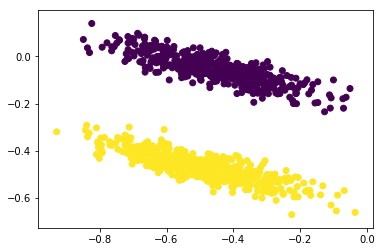

In [12]:
plt.scatter(out2D[:, 0], out2D[:, 1], c=dataset[1])

---
---
---

## Part 2:
### Using the same idea of the previous example with a higher dimension dataset

#### Getting the data it's anonymous data

In [94]:
df = pd.read_csv('data/anonymized_data.csv')
df.shape

(500, 31)

500 example of data in which have 30 feature and 1 label

Scalling the data


In [114]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
data_prt2 = sc.fit_transform(df.drop('Label', axis=1))

### Building our Auto-encoder

In [115]:
# Encoding
input_feat = 30
neurons_h = 2
neurons_out = 30

lr = 0.01

In [116]:
X2 = tf.placeholder(dtype=tf.float32, shape=[None, input_feat])
hid_lyr = tf.contrib.layers.fully_connected(X2, neurons_h, activation_fn=None)
output_lyr = tf.contrib.layers.fully_connected(hid_lyr, neurons_out, activation_fn=None)

In [117]:
loss = tf.reduce_mean(tf.square(X2 - output_lyr))
optimizer = tf.train.AdamOptimizer(lr)
train = optimizer.minimize(loss)
init = tf.global_variables_initializer()

In [118]:
nb_steps = 100
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    for step in range(nb_steps):
        sess.run(train, feed_dict={X2: data_prt2})
        
    output2d = hid_lyr.eval(feed_dict={X2:data_prt2})

So now we have the 2d data from the 30-dims dataset

### Visulaizing the results

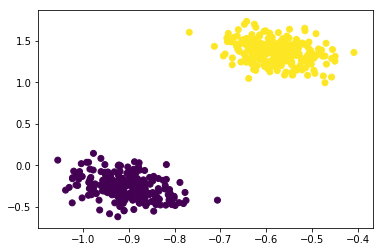

In [119]:
plt.scatter(output2d[:, 0], output2d[:, 1], c=df['Label'])

So as we see below it's a highly seprable 2d dataset now

Thanks for reading.  

Peace ^_^